<a href="https://colab.research.google.com/github/pko89403/Recsys_test/blob/master/Multi_Armed_Bandit_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Armed Bandit Problem
https://github.com/PacktPublishing/Hands-On-Reinforcement-Learning-with-Python/blob/master/Chapter06/6.1%20MAB%20-%20Various%20Exploration%20Strategies.ipynb    

멀티 암드 밴딧 문제는 강화 학습 파트의 한 클래식한 분야다. 멀티 암드 밴딧은 슬롯 머신에 비유할 수 있다.    
슬롯 머신은 카지노에서 하는 도박이다. 슬롯 머신은 임의로 생성한 자신 만의 확률 분포에 기반해서 Arm(레버)를 당겨 보상(reward)를 받는다.    
레버를 하나만 가지는 싱글 슬롯 머신을 원(one)-암드 밴딧으로 부르고 레버가 여러 개인 멀티 슬롯 머신을 멀티 암드 밴듯 이나 k-암드 밴딧이라 부른다.

각 슬롯 머신은 슬롯 머신 각각이 가진 고유한 확률 분포에 따라 그에 대한 보상을 주게 된다. 우리의 목적은 시간의 흐름에 따라 어떤 슬롯 머신이 최대로 누적된 보상을 주는지 찾아내는 것이다.   
    
따라서 각 타임 스텝 t에 대해, 에이전트는 다음과 같은 액션을 한다. 즉(i.e) 
- 슬롯 머신의 레버를 당기고
- 보상을 받고
- 우리의 에이전트의 목적은 누적 보상을 최대화 하는 것이다.

Q(a)를 레버를 당겼을 때의 평균 보상이라고 정의를 한다.

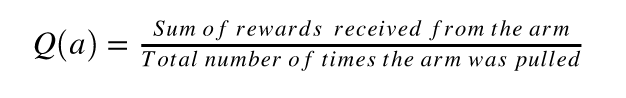

그에 따라 최대의 누적 보상을 주는 최적(optimal)의 레버는 아래와 같아진다.

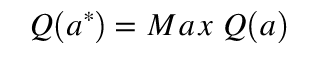

우리의 에이전트의 목적은 최적의 레버(ARM)을 찾는 것 뿐만 아니라 Regret을 최소화하는 것도 포함된다.    
regret은 k개 Arm 중 최적의 Arm을 아는데 소요한 비용으로 정의된다. 어떻게 최고의 Arm을 찾을까?    
모든 Arm들을 조사해야 할까? ( Exploration, GO 스톱)
지금까지 최대 누적 보상을 주는 Arm을 선택해야 할까? ( Exploitation, 고 STOP)

- 하나의 레버만 당기면 다른 레버를 모른다.
- 모든 레버를 도전해서 좋은 레버에서 얻을 수익을 못얻는다.

Exploration과 Exploitation의 TradeOff가 딜레마이다. ( 핵심 )   
다양한 Exploration 전략이 있는데 다음과 같다
- Epsilon-Greedy Policy ( 그리디 한데 입실론 확률로 반항 )
- Softmax Exploration ( Softmax 함수를 써서 확률을 기반해 Exploration )
- Upper Confidence Bound Problem ( 예측 범위, 예측 범위 신뢰도 )
- Thomson Sampling Technique ( 연속적 확률 분포, 샘플링)

실습은 강화학습 프레임워크인 Gym을 사용한다.
강화 학습을 간단히 설명하자면 

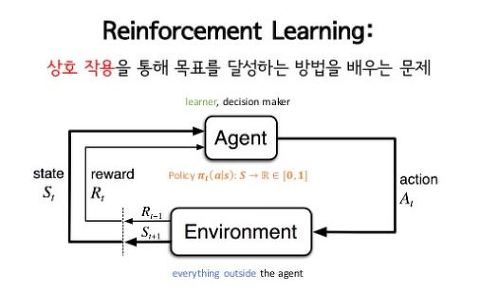

강화 학습은 상호 관계에 바탕을 둔 프레임워크입니다.
강화 학습 알고리즘은 지도 학습 과는 다르게 Agent가 관찰한 Environment로 부터 얻는 Reward과 취할 수 있는 Action   
즉 보상과 액션의 정확한 쌍(할인된 기대 보상 : Discounted Expected Reward)을 학습할 수 있게 해야만 합니다.

우선 Gym 라이브러리를 설치한다. ( 코랩에서 쓰기가 쉽지 않네 )   
OpenAI에서 만든 강화학습을 실험할 수 있도록 환경과 알고리즘을 제공해주는 Python 라이브러리다.

In [0]:
!pip install gym > /dev/null 2>&1

In [0]:
!pip install gym-bandits > /dev/null 2>&1

In [0]:
import gym_bandits
import gym
import numpy as np
import math 
import random

Gym 라이브러리를 사용하는 목적   
강화 학습을 위한 표준화된 인풋과 아웃풋들을 공통 인터페이스에서 사용하기 위한    environment의 컬렉션을 제공하기 위해서다. 

In [0]:
from gym import envs
print(envs.registry.all())

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

강화학습 프레임워크는 아래와 같은 방향으로 동작한다.
1. Agent가 있다. ( 뇌와 같이 선택을 하는 머신러닝 알고리즘 )
2. Agent가 Action을 취한다.
3. Action이 선택되면 Environment에 먹인다.( Feed Action )
4. Environment는 Reward를 내보낸다. ( Get Rewards )
  - 높을 수록 좋은 보상이고 낮을 수록 나쁜 보상이다.
5. Environment는 Observation을 내보낸다, 업데이트된 Environment, State
6. 새로운 Observation과 Reward는 Agent로 다시 Feed-Back 된다.
7. 1번을 다시한다.

In [0]:
env = gym.make("MultiarmedBandits-v0") # 10-armed bandit 환경을 만든다
# env = gym.make('MultiArmedBandits-v0', nr_arms=15) # 15-armed bandit

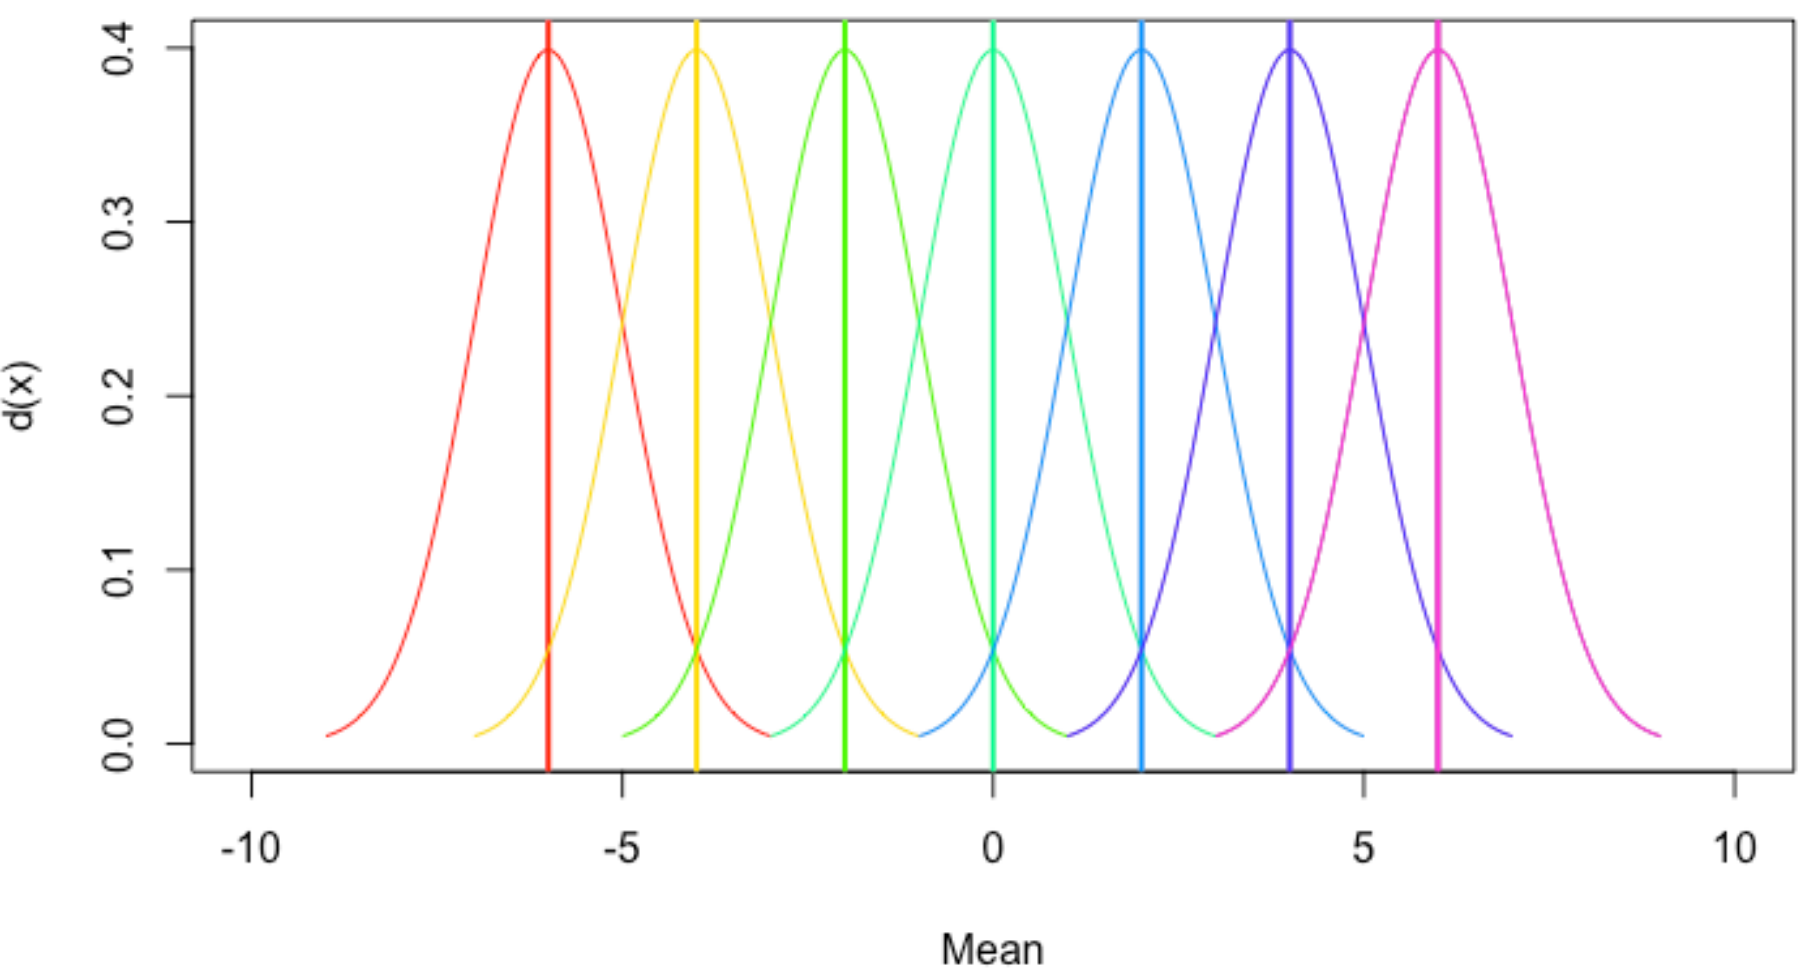

# Epsilon-Greedy Policy

In [0]:
def epsilon_greedy(epsilon=0.5):
  rand = np.random.random()
  if rand < epsilon:
    action = env.action_space.sample() # 10개의 레버를 당기는 액션 배열을 샘플링한다. 임의의 레버를 선택한다.
  else:
    action = np.argmax(Q)
  return action

In [0]:
# 게임할 라운드 수 ( 총 반복 횟수 )
num_rounds = 20000

# ARM(레버)이 당겨진 횟수
count = np.zeros(10)

# 각 ARM에서 나온 보상의 합
sum_rewards = np.zeros(10)

# Q 값 -> 평균 보상
Q = np.zeros(10)

In [0]:
# 레버를 당겨보자!!!
for i in range(num_rounds):
  # 입실론 그리디 방법을 사용해서 Arm(레버)를 선택한다
  selected_arm = epsilon_greedy(0.5)
  
  # 선택한 Arm의 보상을 받는다. step을 environment에 적용한다.
  observation, reward, done, info = env.step(selected_arm)
  # 입실론 그리디 방법에서는 DONE과 INFO에 대해서는 몰라도 됨.
  # 본 코드에서는 REWARD와 OBSERVATION 변수들을 Agent에 피딩하지는 않는다.
  # Obeservation : 관찰값
  # Reward : Action을 한 결과로 env에서 받는 Reward 
  # Done : 목표를 달성했는가? 에이전트가 죽었는가? 인 에피소드가 종료되었는가?
  # Info : 환경의 정보

  #print("observation space is: ",observation)
  #print("reward variable is: ",reward)
  #print("done flag is: ",done)
  #print("info variable is: ",info)
  
  # 각 ARM(레버)가 당겨진 횟수를 업데이트한다.
  count[selected_arm] += 1

  # 각 ARM(레버)를 통해 얻어진 누적 보상을 업데이트한다.
  sum_rewards[selected_arm] += reward
  
  # 각 ARM(레버)의 평균 보상인 Q값을 업데이트
  Q[selected_arm] = sum_rewards[selected_arm] / count[selected_arm]
  

In [0]:
print(f"최적 ARM(레버)는 {np.argmax(Q)} 이다.")

최적 ARM(레버)는 4 이다.


#Softmax Exploration
Softmax(소프트맥스)는 입력받은 값을 출력으로 0~1사이의 값으로 모두 정규화하며 출력 값들의 총합은 항상 1이 되는 특성을 가진 함수이다.    
tau 는 온도 파라미터다. 
- tau가 높아질수록, 모든 액션이 거의 같은 확률을 가지게 된다.
- tau가 낮아질수록, 액션 간의 격차가 크게 나게 된다.

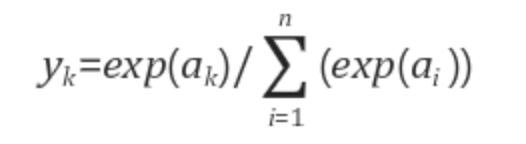
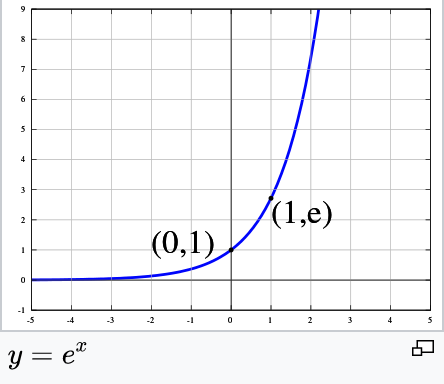

In [0]:
def softmax(tau=1):
  total = sum([math.exp(val/tau) for val in Q])
  probs = [math.exp(val/tau)/total for val in Q] # softmax 방법을 통해 보상에 따른 각 레버의 확률을 구한다.

  threshold = random.random() # 0 - 1 사이의 숫자를 하나 뽑는다.
  cumulative_prob = 0.0

  for i in range(len(probs)): # 10개의 레버에 대해
    cumulative_prob += probs[i] # 10개 레버의 누적 확률을 구한다.
    if( cumulative_prob > threshold): # 10개 레버의 누적 확률을 구하는 중에 임계치 보다 커지면 레버 뽑는다
      return i
  return np.argmax(probs) # 아니면 최적의 레버를 뽑는다

In [0]:
# 게임할 라운드 수 ( 총 반복 횟수 )
num_rounds = 20000

# ARM(레버)이 당겨진 횟수
count = np.zeros(10)

# 각 ARM에서 나온 보상의 합
sum_rewards = np.zeros(10)

# Q 값 -> 평균 보상
Q = np.zeros(10)

In [0]:
for i in range(num_rounds):
    
    # Select the arm using softmax
    arm = softmax(0.5)
    
    # Get the reward
    observation, reward, done, info = env.step(arm) 
    
    # update the count of that arm
    count[arm] += 1
    
    # Sum the rewards obtained from the arm
    sum_rewards[arm]+=reward
    
    # calculate Q value which is the average rewards of the arm
    Q[arm] = sum_rewards[arm]/count[arm]

In [0]:
print(f"최적 ARM(레버)는 {np.argmax(Q)} 이다.")

최적 ARM(레버)는 4 이다.


#Upper Confidence Bound
Reward가 얼마나 많은 Exploration으로 알려진 결과인지 Confidence를 함께, 불확실성을 계산하고 더 불확실한 쪽에 더 많은 탐색을 하는 방식이다. 불확실한 곳에 더 높은 보상을 주는 레버가 있다고 가정하는 것이다.
- t는 레버의 총 탐색 시행 횟수
- ui는 i번째 arm의 기댓값 ( Exploitation ), t번째 시도 까지의 보상의 평균 
- Pi는 확률 분포에 대한 불확실성 ( Exploration ), 불확실성을 가장 낙관적으로 여겼을 때 해당 arm에 대한 기댓값을 나타내므로 (Upper Confidence Bound)
- ni는 i번째 arm이 탐색 된 횟수 

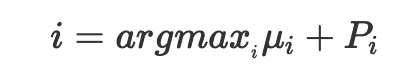
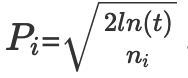

In [0]:
def UCB(iters):
    
    ucb = np.zeros(10)
    
    # 각 레버에 대해서 한번씩은 다 해본다. 한번씩 다 해보는 이 부분이 UCB의 문제점
    if iters < 10:
        return i
    
    else:
        for arm in range(10):
            
            # calculate upper bound
            upper_bound = math.sqrt( (2*math.log(sum(count))) / count[arm] )
            
            # add upper bound to the Q valyue
            ucb[arm] = Q[arm] + upper_bound
            
        # return the arm which has maximum value
        return (np.argmax(ucb))

In [0]:
# 게임할 라운드 수 ( 총 반복 횟수 )
num_rounds = 20000

# ARM(레버)이 당겨진 횟수
count = np.zeros(10)

# 각 ARM에서 나온 보상의 합
sum_rewards = np.zeros(10)

# Q 값 -> 평균 보상
Q = np.zeros(10)

In [0]:
for i in range(num_rounds):
    
    # Select the arm using UCB
    arm = UCB(i)
    
    # Get the reward
    observation, reward, done, info = env.step(arm) 
    
    # update the count of that arm
    count[arm] += 1
    
    # Sum the rewards obtained from the arm
    sum_rewards[arm]+=reward
    
    # calculate Q value which is the average rewards of the arm
    Q[arm] = sum_rewards[arm]/count[arm]

In [0]:
print(f"최적 ARM(레버)는 {np.argmax(Q)} 이다.")

#Thompson Sampling
https://brunch.co.kr/@chris-song/66
## 사전 지식
### 표현식 p(A)
사건 A 가 참일 확률을 의미한다. 확률의 값은 0 부터 1의 값을 가질 수 있다.
### 확률 질량 함수 (pmf, probability mass function )
p(x)은 사건 x가 일어날 확률. 모든 사건이 일어날 확률은 1
### 베르누이 분포 (bernoulli distribution )
광고를 보여줄 때 클릭할 확률로 예시를 들면    
X는 {0, 1} 두개의 항(이항)의 확률 변수, theta는 광고가 클릭될 확률이다.    
X는 베르누이 분포를 가진다고 한다. 아래와 같이 표현함



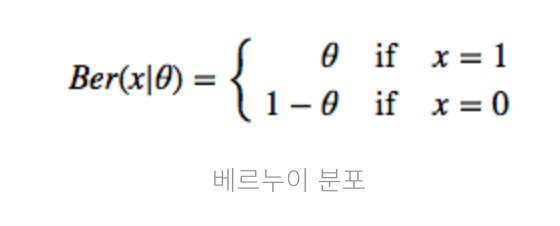

###베타 분포(beta distribution)
http://norman3.github.io/prml/docs/chapter02/1.html
베타 분포는 두 개의 양수의 변수로 표현할 수 있는 확률 분포다.    
[0,1] 사이 구간을 지원한다. 톰슨 샘플링을 위한 핵심 개념!   
베타 함수 B(a,b)는 이항 계수를 일반화한 것이다. 
사전 확률, 사후 확률 개념에 활용하기 위해 적용한 것임!
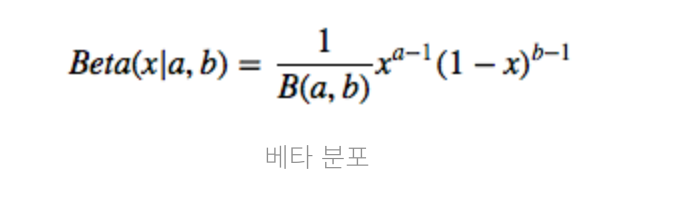

### 톰슨 샘플링
각 레버에 대한 보상을 베타 분포로 표현한다면?    
레버를 당겼을 때, 광고 클릭에 대해
- 양의 보상을 받을 확률, 클릭할 확률
- 음의 보상을 받을 확률, 클릭 안할 확률

베타 공간에 양의 보상을 받은 횟수와 음의 보상을 받은 횟수를 이용해서 확률 밀도 함수(PMF)를 그린다. (Draw)     
그린 확률 밀도의 값을 샘플링해 값을 뽑는다.   
이 값 중 가장 큰 값의 배너( argmax Q )를 선택한다.    
획득한 보상을 통해 다시 톰슨 샘플링을 반복한다.   





In [0]:
def thompson_sampling(alpha,beta):
    
    samples = [np.random.beta(alpha[i]+1,beta[i]+1) for i in range(10)]

    return np.argmax(samples)

In [0]:
# 게임할 라운드 수 ( 총 반복 횟수 )
num_rounds = 20000

# ARM(레버)이 당겨진 횟수
count = np.zeros(10)

# 각 ARM에서 나온 보상의 합
sum_rewards = np.zeros(10)

# Q 값 -> 평균 보상
Q = np.zeros(10)

# 알파와 베타 값들을 초기화한다
alpha = np.ones(10)
beta = np.ones(10)

In [0]:
for i in range(num_rounds):
    
    # Select the arm using thompson sampling
    arm = thompson_sampling(alpha,beta)
    
    # Get the reward
    observation, reward, done, info = env.step(arm) 
    
    # update the count of that arm
    count[arm] += 1
    
    # Sum the rewards obtained from the arm
    sum_rewards[arm]+=reward
    
    # calculate Q value which is the average rewards of the arm
    Q[arm] = sum_rewards[arm]/count[arm]

    # If it is a positive reward increment alpha
    if reward >0:
        alpha[arm] += 1
        
    # If it is a negative reward increment beta
    else:
        beta[arm] += 1

In [0]:
print(f"최적 ARM(레버)는 {np.argmax(Q)} 이다.")